In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/multi-domain-sentiment-analysis-persian/Multi-domain.xlsx


In [2]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
import tensorflow as tf

import warnings

warnings.filterwarnings('ignore')

# **1-Load Data**

In [3]:
xls = pd.ExcelFile('/kaggle/input/multi-domain-sentiment-analysis-persian/Multi-domain.xlsx')

df_Shoes = pd.read_excel(xls, 'Shoes')
df_Perfume = pd.read_excel(xls, 'Perfume')
df_Phone = pd.read_excel(xls, 'Phone')
df_Kream = pd.read_excel(xls, 'Kream')
df_Printer = pd.read_excel(xls, 'Printer')
df_dress = pd.read_excel(xls, 'dress')
df_Book = pd.read_excel(xls, 'Book')
df_Bad = pd.read_excel(xls, 'Bad')
df_Machine = pd.read_excel(xls, 'Machine')
df_Gold = pd.read_excel(xls, 'Gold')

In [4]:
df_Gold.head(10)

,Unnamed: 0,review,Class
0,NaN,آویز طراحی جالب و زیبایی دارد,1.0
1,NaN,آویز زیباست توصیه میکنم,1.0
2,NaN,اویز نسبت به قیمت خوبه,1.0
3,NaN,آویز خیلی ظاهر زیبایی داره و خیلی تو گردن قشنگ...,1.0
4,NaN,اویز طراحی زیبایی داشت و اتفاقا بر خلاف وزنش ب...,1.0
5,NaN,فقط یک کم به نظر می رسد اجرت ساخت اویز بالایی ...,0.0
6,NaN,اویز خیلی کوچیک و ظریف هست زیباست,1.0
7,NaN,اویز مناسب هدیه دادن برای دوستان خیلی قشنگ و ج...,1.0
8,NaN,اویز تو شگفت انگیز خریدم خوب بود,1.0
9,NaN,اویز اندازه کوچک و بسیار نازک نخرید بهتره,0.0


In [5]:
df_Shoes = df_Shoes.drop('Unnamed: 0',axis=1)
df_Perfume = df_Perfume.drop('Unnamed: 0',axis=1)
df_Phone = df_Phone.drop('Unnamed: 0',axis=1)
df_Kream = df_Kream.drop('Unnamed: 0',axis=1)
df_Printer = df_Printer.drop('Unnamed: 0',axis=1)
df_dress = df_dress.drop('Unnamed: 0',axis=1)
df_Book = df_Book.drop('Unnamed: 0',axis=1)
df_Bad = df_Bad.drop('Unnamed: 0',axis=1)
df_Machine = df_Machine.drop('Unnamed: 0',axis=1)
df_Gold = df_Gold.drop('Unnamed: 0',axis=1)

In [6]:
my_array = []
for index,row in df_Shoes.iterrows():
    my_array.append('Shoes')
df_Shoes['Domain'] = my_array

In [7]:
my_array = []
for index,row in df_Perfume.iterrows():
    my_array.append('Perfume')
df_Perfume['Domain'] = my_array

In [8]:
my_array = []
for index,row in df_Phone.iterrows():
    my_array.append('Phone')
df_Phone['Domain'] = my_array

In [9]:
my_array = []
for index,row in df_Kream.iterrows():
    my_array.append('Kream')
df_Kream['Domain'] = my_array

In [10]:
my_array = []
for index,row in df_Printer.iterrows():
    my_array.append('Printer')
df_Printer['Domain'] = my_array

In [11]:
my_array = []
for index,row in df_dress.iterrows():
    my_array.append('dress')
df_dress['Domain'] = my_array

In [12]:
my_array = []
for index,row in df_Book.iterrows():
    my_array.append('Book')
df_Book['Domain'] = my_array

In [13]:
my_array = []
for index,row in df_Bad.iterrows():
    my_array.append('Bad')
df_Bad['Domain'] = my_array

In [14]:
my_array = []
for index,row in df_Machine.iterrows():
    my_array.append('Machine')
df_Machine['Domain'] = my_array

In [15]:
my_array = []
for index,row in df_Gold.iterrows():
    my_array.append('Gold')
df_Gold['Domain'] = my_array

In [16]:
df = pd.concat([df_Shoes ,df_Perfume ,df_Phone ,df_Kream ,df_Printer ,df_dress ,df_Book ,df_Bad ,df_Machine ,df_Gold], ignore_index=True)

<div style="background-color: green; padding: 20px; border-radius: 25px; ">
<font color='white' size="5px">
Data Overview
    </font>
</div>

In [17]:
df.head(10)

,review,Class,Domain
0,من این کفش رو برای خودم خریدم چون سایز پام کوچ...,1.0,Shoes
1,کفش خوش دوخت و تمیز وسایز مناسب,1.0,Shoes
2,پسرم راضی نبود کتانی را مرجوع کردم,0.0,Shoes
3,کاملا تخت و فاقد لژ,1.0,Shoes
4,\nکفش مدل fashion x\n\nبسیار بسیار خشک مخصوصا ...,0.0,Shoes
5,سبک و شیک\nتو پا خیلی شیک\nیه سایز بزرگتر سفار...,1.0,Shoes
6,جنسش واقعا خوبه،تو پا خیلی قشنگ دیده میشه،فقط ...,1.0,Shoes
7,کفش شیک و زیباییه. قسمت سفید کفیش خیلی خیلی سف...,1.0,Shoes
8,زبونه.کتانی هم خیلی بدحالته به چپ و راست تمایل...,0.0,Shoes
9,\nقابل قبول و کاربردی\nنسبت به قیمتش از نظر کی...,1.0,Shoes


In [18]:
missing_values_count = df.isnull().sum()
missing_values_count

review      8
Class     170
Domain      0
dtype: int64

In [19]:
df = df.dropna()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50803 entries, 0 to 50972
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  50803 non-null  object
 1   Class   50803 non-null  object
 2   Domain  50803 non-null  object
dtypes: object(3)
memory usage: 1.6+ MB


# **2-Data Cleaning**

In [21]:
df.loc[(df['Class']!=0.0) & (df['Class']!=1.0)]

,review,Class,Domain
13138,گوشی موبایل سامسونگ مدل Galaxy A30s SM-A307FN/...,6ت,Phone
15119,بهترین گوشی رده متوسط بازاره خیلی سریع شارژ می...,11,Phone
15208,گوشی موبایل سامسونگ مدل Galaxy A71 SM-A715F/DS...,گوشی موبایل سامسونگ مدل Galaxy A71 SM-A715F/DS...,Phone
24433,خوبه ولی بعد مدتی در منطقه ما بدلیل گرد وخاک خ...,2.0,Printer


In [22]:
for i in df.loc[(df['Class']!=0) & (df['Class']!=1)].index:
    df = df.drop([i])

# **3-Exploratery Data Analysis**

In [23]:
X = df['review']
Y = df['Class']

print('Number of Dataset sentence' , X.shape)
print('Number of Dataset labels' , Y.shape)

Number of Dataset sentence (50799,)
Number of Dataset labels (50799,)


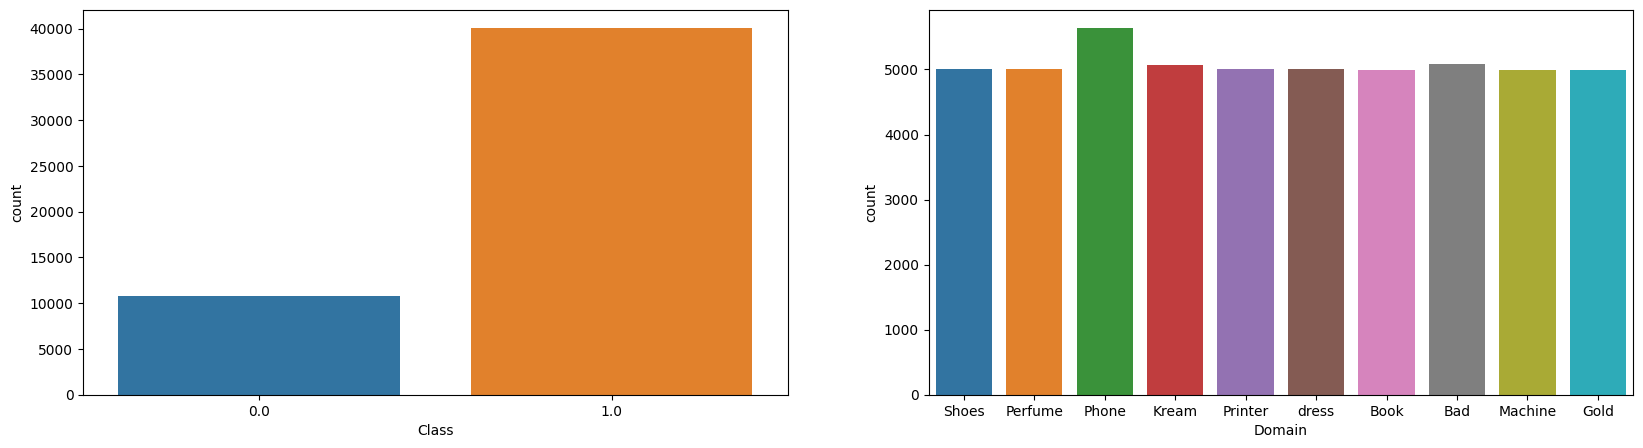

In [24]:
fig, axes = plt.subplots(1,2, figsize=(20,5))

sns.countplot(data=df, x='Class', ax=axes[0]);
sns.countplot(data=df, x='Domain', ax=axes[1]);

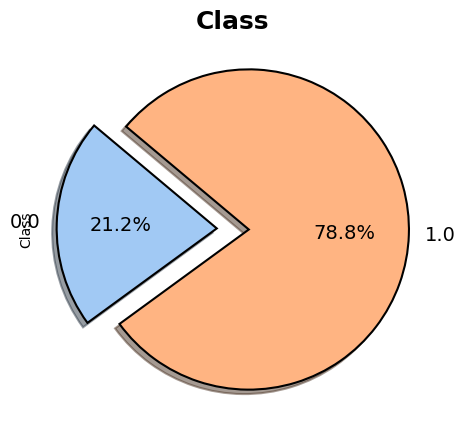

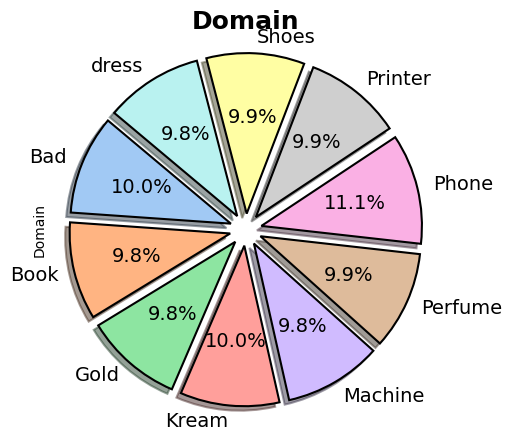

In [25]:
columns = {
    'Class': df['Class'],
    'Domain': df['Domain']
}

def plot_data(name, data):
    plt.figure(figsize=(5, 5))
    palette_color = sns.color_palette('pastel')
    explode = [0.1 for _ in range(data.nunique())]

    target_counts = df.groupby(name)[name].count()

    target_counts.plot.pie(
    colors=palette_color,
    explode=explode,
    autopct="%1.1f%%",
    shadow=True,
    startangle=140,
    textprops={'fontsize': 14},
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.5} 
    )

    plt.title(name, fontsize=18, weight='bold')
    plt.axis('equal')
    plt.show()


for name, data in columns.items():
    plot_data(name, data)

In [26]:
df.loc[[4]]['review']

4    \nکفش مدل fashion x\n\nبسیار بسیار خشک مخصوصا ...
Name: review, dtype: object

# **4-Removing alphabet characters**

In [27]:
unwanted_alphabet = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z',
                    'A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']

for i in df['review']:
    text = i
    for alpha in unwanted_alphabet:
        text = text.replace(alpha,'') 
    df.loc[df.loc[df['review']==i].index, 'review'] = text

# **5-Removing digit characters**

In [28]:
unwanted_digit = ['0','1','2','3','4','5','6','7','8','9']

for i in df['review']:
    text = i
    for digit in unwanted_digit:
        text = text.replace(digit,'')
    df.loc[df.loc[df['review']==i].index, 'review'] = text

# **6-Removing punc characters**

In [29]:
unwanted_punc = ['!','@','#','$','%','^','&','*','(',')','_','-','=','+','{','}','[',']','\\','\n','\t','.','<','>','/','?','|',';',',','"',':']

for i in df['review']:
    text = i
    for punc in unwanted_punc:
        text = text.replace(punc,'')
    df.loc[df.loc[df['review']==i].index, 'review'] = text

In [30]:
df.head(10)

,review,Class,Domain
0,من این کفش رو برای خودم خریدم چون سایز پام کوچ...,1.0,Shoes
1,کفش خوش دوخت و تمیز وسایز مناسب,1.0,Shoes
2,پسرم راضی نبود کتانی را مرجوع کردم,0.0,Shoes
3,کاملا تخت و فاقد لژ,1.0,Shoes
4,کفش مدل بسیار بسیار خشک مخصوصا کفی کفشبطوریکه...,0.0,Shoes
5,سبک و شیکتو پا خیلی شیکیه سایز بزرگتر سفارش بدید,1.0,Shoes
6,جنسش واقعا خوبه،تو پا خیلی قشنگ دیده میشه،فقط ...,1.0,Shoes
7,کفش شیک و زیباییه قسمت سفید کفیش خیلی خیلی سفت...,1.0,Shoes
8,زبونهکتانی هم خیلی بدحالته به چپ و راست تمایل ...,0.0,Shoes
9,قابل قبول و کاربردینسبت به قیمتش از نظر کیفیت ...,1.0,Shoes


# **7-Data Preparation**

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50799 entries, 0 to 50972
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  50799 non-null  object
 1   Class   50799 non-null  object
 2   Domain  50799 non-null  object
dtypes: object(3)
memory usage: 3.6+ MB


In [32]:
df['Class'] = df['Class'].astype(int)

In [33]:
df.head()

,review,Class,Domain
0,من این کفش رو برای خودم خریدم چون سایز پام کوچ...,1,Shoes
1,کفش خوش دوخت و تمیز وسایز مناسب,1,Shoes
2,پسرم راضی نبود کتانی را مرجوع کردم,0,Shoes
3,کاملا تخت و فاقد لژ,1,Shoes
4,کفش مدل بسیار بسیار خشک مخصوصا کفی کفشبطوریکه...,0,Shoes


In [34]:
encoder = LabelEncoder()
df['Domain'] = encoder.fit_transform(df['Domain'])
df.head()

,review,Class,Domain
0,من این کفش رو برای خودم خریدم چون سایز پام کوچ...,1,8
1,کفش خوش دوخت و تمیز وسایز مناسب,1,8
2,پسرم راضی نبود کتانی را مرجوع کردم,0,8
3,کاملا تخت و فاقد لژ,1,8
4,کفش مدل بسیار بسیار خشک مخصوصا کفی کفشبطوریکه...,0,8


In [35]:
y_Class = np.array(df['Class'])
y_Domain = np.array(df['Domain'])

In [36]:
max_fatures = 1000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(df['review'].values)

X = tokenizer.texts_to_sequences(df['review'].values)
X = pad_sequences(X,maxlen=290)
print(X.shape)

(50799, 290)


# **8-Simple Deep Learning Model**

In [37]:
inputs1 = tf.keras.layers.Input(shape=(290,))
embedding1 = tf.keras.layers.Embedding(len(tokenizer.word_index) + 1, 100)(inputs1)
conv1 = tf.keras.layers.Conv1D(filters=256, kernel_size=4, activation='relu')(embedding1)
drop1 = tf.keras.layers.Dropout(0.5)(conv1)
pool1 = tf.keras.layers.MaxPooling1D(pool_size=2)(drop1)
conv2 = tf.keras.layers.Conv1D(filters=128, kernel_size=4, activation='relu')(pool1)
drop2 = tf.keras.layers.Dropout(0.5)(conv2)
pool2 = tf.keras.layers.MaxPooling1D(pool_size=2)(drop2)
flat1 = tf.keras.layers.Flatten()(pool2)

embedding2 = tf.keras.layers.Embedding(len(tokenizer.word_index) + 1, 100)(inputs1)
conv2 = tf.keras.layers.Conv1D(filters=256, kernel_size=4, activation='relu')(embedding2)
drop2 = tf.keras.layers.Dropout(0.5)(conv2)
pool2 = tf.keras.layers.MaxPooling1D(pool_size=2)(drop2)
conv3 = tf.keras.layers.Conv1D(filters=126, kernel_size=4, activation='relu')(pool2)
drop3 = tf.keras.layers.Dropout(0.5)(conv3)
pool3 = tf.keras.layers.MaxPooling1D(pool_size=2)(drop3)
flat2 = tf.keras.layers.Flatten()(pool2)

# fully connected layers
dense_1 = tf.keras.layers.Dense(128, activation = 'relu', name = 'Class')(flat1)
dense_2 = tf.keras.layers.Dense(128, activation = 'relu', name = 'Domain')(flat2)

dropout_2 = tf.keras.layers.Dropout(0.5) (dense_1)
dropout_3 = tf.keras.layers.Dropout(0.5) (dense_2)

output_1 = tf.keras.layers.Dense(1, activation='sigmoid', name='Class_out') (dropout_2)
output_2 = tf.keras.layers.Dense(1, activation='relu', name='Domain_out') (dropout_3)


model = Model(inputs=[inputs1], outputs=[output_1, output_2])

model.compile(loss=['binary_crossentropy', 'mae'], optimizer='adam', metrics=['accuracy', 'mae'])
print(model.summary())

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 290)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 290, 100)  │  2,788,300 │ input_layer[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 287, 256)  │    102,656 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 287, 256)  │          0 │ conv1d[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d       │ (None, 143, 256)  │          0 │ dropout[0][0]     │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 290, 100)  │  2,788,300 │ input_layer[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 140, 128)  │    131,200 │ max_pooling1d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 287, 256)  │    102,656 │ embedding_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 140, 128)  │          0 │ conv1d_1[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 287, 256)  │          0 │ conv1d_2[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_1     │ (None, 70, 128)   │          0 │ dropout_1[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_2     │ (None, 143, 256)  │          0 │ dropout_2[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 8960)      │          0 │ max_pooling1d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 36608)     │          0 │ max_pooling1d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Class (Dense)       │ (None, 128)       │  1,147,008 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Domain (Dense)      │ (None, 128)       │  4,685,952 │ flatten_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 128)       │          0 │ Class[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 128)       │          0 │ Domain[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Class_out (Dense)   │ (None, 1)         │        129 │ dropout_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Domain_out (Dense)  │ (None, 1)         │        129 │ dropout_5[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 11,746,330 (44.81 MB)

 Trainable params: 11,746,330 (44.81 MB)

 Non-trainable params: 0 (0.00 B)

None


In [38]:
history = model.fit(x=X, y=[y_Class, y_Domain], epochs=5, validation_split=0.2)

Epoch 1/5
1270/1270 ━━━━━━━━━━━━━━━━━━━━ 312s 243ms/step - Class_out_accuracy: 0.8046 - Domain_out_mae: 2.2257 - loss: 2.6808 - val_Class_out_accuracy: 0.8422 - val_Domain_out_mae: 1.4117 - val_loss: 1.7710
Epoch 2/5
1270/1270 ━━━━━━━━━━━━━━━━━━━━ 331s 250ms/step - Class_out_accuracy: 0.8639 - Domain_out_mae: 1.7366 - loss: 2.0635 - val_Class_out_accuracy: 0.8386 - val_Domain_out_mae: 1.5172 - val_loss: 1.8770
Epoch 3/5
1270/1270 ━━━━━━━━━━━━━━━━━━━━ 314s 247ms/step - Class_out_accuracy: 0.8775 - Domain_out_mae: 1.6555 - loss: 1.9522 - val_Class_out_accuracy: 0.8416 - val_Domain_out_mae: 1.5678 - val_loss: 1.9223
Epoch 4/5
1270/1270 ━━━━━━━━━━━━━━━━━━━━ 317s 250ms/step - Class_out_accuracy: 0.8922 - Domain_out_mae: 1.6189 - loss: 1.8824 - val_Class_out_accuracy: 0.8405 - val_Domain_out_mae: 1.5056 - val_loss: 1.8648
Epoch 5/5
1270/1270 ━━━━━━━━━━━━━━━━━━━━ 318s 250ms/step - Class_out_accuracy: 0.8978 - Domain_out_mae: 1.5496 - loss: 1.8042 - val_Class_out_accuracy: 0.8358 - val_Domain_

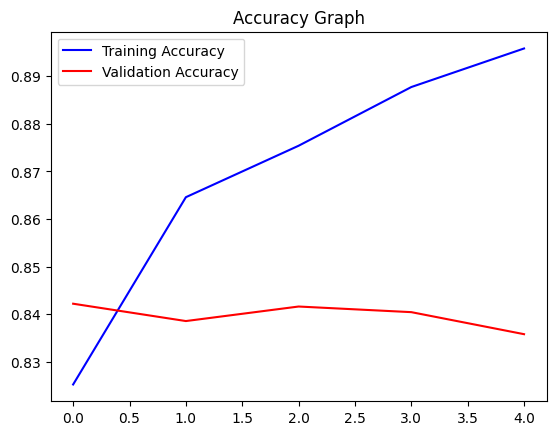

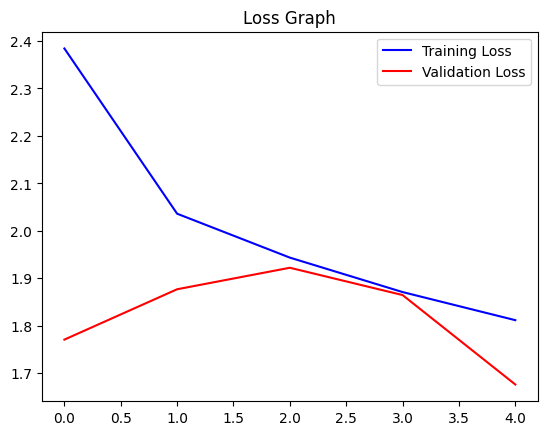

In [39]:
acc = history.history['Class_out_accuracy']
val_acc = history.history['val_Class_out_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()